In [1]:
import os
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython
import pandas as pd
from scipy.io import wavfile as wav
from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
print('ok')

ok


In [ ]:
def plot_roc(y_test, y_pred, y_prob):  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [2]:
os.getcwd()

'C:\\Users\\ydinc\\Documents\\python_calismalar'

In [25]:
os.chdir('../../Downloads/wavsound/')

In [26]:
files = os.listdir()

In [27]:
len(files)

127

In [28]:
malfunlist = []
serinolist = []
fileNameslist = []
table = pd.DataFrame(columns=['file','serino', 'malfun', 'target'])
for i,file in enumerate(files):
    serino = file[0:8]
    serinolist.append(serino)
    malfun =  file.split("_")[1]
    malfunlist.append(malfun)
    fileNames = serino + '-' + malfun
    fileNameslist.append(fileNames)
    table.loc[i, 'file'] = file
    table.loc[i, 'serino'] = serino
    table.loc[i, 'malfun'] = malfun
    if malfun!='HEALTHY':
        table.loc[i, 'target'] = 1
    else:
        table.loc[i, 'target'] = 0

In [29]:
set(malfunlist)

{'FUEL', 'HEALTHY', 'OTHER', 'TURBO', 'VALVES'}

In [30]:
table.target.value_counts()

0    88
1    39
Name: target, dtype: int64

In [12]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras.models import Sequential
from sklearn.metrics import roc_curve, confusion_matrix, auc, roc_auc_score, precision_recall_curve, accuracy_score
import warnings
#warnings.filterwarnings('ignore')

In [31]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label' #will del
header = header.split()

In [32]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [33]:
os.getcwd()

'C:\\Users\\ydinc\\Downloads\\wavsound'

In [36]:
file = open('../dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
#genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
#for g in genres:
for filename in os.listdir():
    songname = filename
    y, sr = librosa.load(songname, mono=True)
    #print(songname)
    #break
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    #to_append += f' {g}'
    file = open('../dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [18]:
import IPython.display as ipd
ipd.Audio(songname)

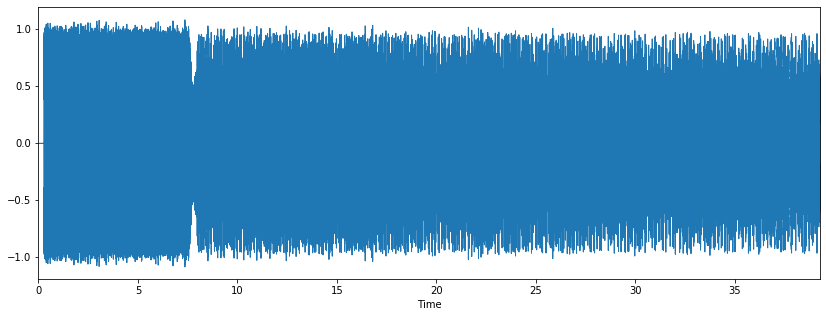

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa_audio, librosa_sample_rate = librosa.load(songname)
librosa.display.waveplot(librosa_audio, sr=librosa_sample_rate)

In [38]:
data = pd.read_csv('../dataset.csv')

In [42]:
# Dropping unneccesary columns
data = data.drop(['filename', 'label'],axis=1)
#Encoding the Labels
target = table.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(target)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data, dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               6912      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 50,689
Trainable params: 50,689
Non-trainable params: 0
_________________________________________________________________


In [71]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    verbose=2)

Train on 101 samples, validate on 26 samples
Epoch 1/100
 - 1s - loss: 0.7073 - acc: 0.3168 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.6494 - acc: 0.7426 - val_loss: 0.6889 - val_acc: 0.5385
Epoch 3/100
 - 0s - loss: 0.5949 - acc: 0.7525 - val_loss: 0.7044 - val_acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.5338 - acc: 0.7921 - val_loss: 0.7298 - val_acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.4740 - acc: 0.8317 - val_loss: 0.8117 - val_acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.4230 - acc: 0.8020 - val_loss: 0.7237 - val_acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.4168 - acc: 0.9208 - val_loss: 0.9972 - val_acc: 0.5385
Epoch 8/100
 - 0s - loss: 0.3825 - acc: 0.7822 - val_loss: 0.7757 - val_acc: 0.5385
Epoch 9/100
 - 0s - loss: 0.3368 - acc: 0.9406 - val_loss: 1.0228 - val_acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.2894 - acc: 0.8713 - val_loss: 0.9068 - val_acc: 0.5385
Epoch 11/100
 - 0s - loss: 0.2502 - acc: 0.9406 - val_loss: 1.0907 - val_acc: 0.5385
Epoch 12/100
 - 0s - loss: 0.

Epoch 95/100
 - 0s - loss: 8.2850e-05 - acc: 1.0000 - val_loss: 4.1293 - val_acc: 0.5000
Epoch 96/100
 - 0s - loss: 8.1289e-05 - acc: 1.0000 - val_loss: 4.1315 - val_acc: 0.5000
Epoch 97/100
 - 0s - loss: 7.9783e-05 - acc: 1.0000 - val_loss: 4.1364 - val_acc: 0.5000
Epoch 98/100
 - 0s - loss: 7.8326e-05 - acc: 1.0000 - val_loss: 4.1517 - val_acc: 0.5000
Epoch 99/100
 - 0s - loss: 7.6898e-05 - acc: 1.0000 - val_loss: 4.1570 - val_acc: 0.5000
Epoch 100/100
 - 0s - loss: 7.5528e-05 - acc: 1.0000 - val_loss: 4.1614 - val_acc: 0.5000


In [72]:
pred_prob = model.predict(X_test)
pred_classes = [1 if x >= 0.5 else 0 for x in pred_prob]

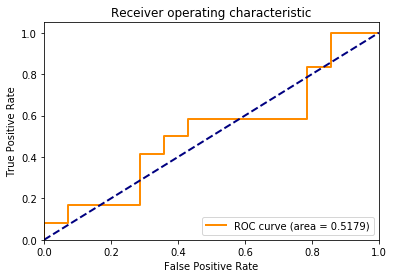

In [73]:
fpr, tpr, thresholds = plot_roc(y_test, pred_classes, pred_prob)

In [74]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [75]:
pred_classes

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [76]:
accuracy_score(y_test, pred_classes)

0.5

In [84]:
def load_wave_file(path):
    wav, sr = librosa.load(path)
    return wav, sr

"""Zero Padding all files"""
def zero_pad_allfiles(files):
    pathfiles = files #list(map(lambda x: get_wave_path(x,wav_path),files))
    wave_files = []
    for file in pathfiles:
        wav, sr = load_wave_file(file)
        #pad by audio length
        wav_pad = zero_pad(wav, audio_len)  
        wave_files.append(wav_pad)
    return wave_files


"""Finds max length of all files"""
def get_max_len(files):
    maxL = 0
    for file in files:
        wav, sr = load_wav_file(file, wav_path)
        if len(wav) > maxL:
            maxL = len(wav)
    
    return maxL

"""Cuts arrays under length or and pads arrays over length with zeros"""
def zero_pad(arr, length):
    l = len(arr)
    if l > length:
        result = arr[0:length]
    else:
        zero_pad = np.zeros(length - l)
        result = np.concatenate([arr, zero_pad])
    return result

"""Repeats np 1D array to given length, and makes datatype float"""
def repeat_to_len(arr, length):
    result = np.empty((length, ), dtype = 'float32')
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

"""Cuts 2d arrays under length or and pads arrays over length with zeros """
def zero_pad_2d(arr, length):
    l = arr.shape[1]
    if l > length:
        result = arr[:,0:length]
    else:
        zero_pad = np.zeros((arr.shape[0], length - arr.shape[1]))
        result = np.hstack((arr, zero_pad))
        
    return result


In [124]:
%%time
#files = list(train['wavfile'])
wave_files = zero_pad_allfiles(files=files)

Wall time: 5min 20s


In [89]:
#normal_wav, sr = load_wave_file(files[1])

In [90]:
sample_rate = 22050
print(librosa.get_duration(normal_wav))
print(len(normal_wav)/sample_rate)

59.71700680272109
59.71700680272109


In [123]:
atime = 40
audio_len = atime*sample_rate

In [125]:
#Labels as Actuals 
y_data = encoder.fit_transform(target)
#x_data = np.vstack(wave_files) #orj
scaler = StandardScaler()
x_data = scaler.fit_transform(np.array(wave_files, dtype = float))
#split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [100]:
from keras import Input
from keras.layers import Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense, LSTM, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2

In [122]:
len(x_data[0])

1323000

In [126]:
nn_model = Sequential()
nn_model.add(Dense(256, input_shape=x_train[0].shape, activation='relu', kernel_regularizer=l2(0.02)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               225792256 
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total para

In [127]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [113]:
y_train.sum()

26

In [114]:
y_test.sum()

13

In [128]:
%%time
hist = nn_model.fit(x_train, y_train, epochs=20, batch_size=32,validation_data=(x_test, y_test),verbose=2)

Train on 88 samples, validate on 39 samples
Epoch 1/20
 - 90s - loss: 17.4379 - binary_accuracy: 0.6705 - val_loss: 29.4055 - val_binary_accuracy: 0.7436
Epoch 2/20
 - 78s - loss: 36.0023 - binary_accuracy: 0.6705 - val_loss: 45.1650 - val_binary_accuracy: 0.7436
Epoch 3/20
 - 70s - loss: 49.7074 - binary_accuracy: 0.6705 - val_loss: 53.1813 - val_binary_accuracy: 0.7436
Epoch 4/20
 - 77s - loss: 55.4906 - binary_accuracy: 0.6705 - val_loss: 53.8928 - val_binary_accuracy: 0.7436
Epoch 5/20
 - 82s - loss: 55.8815 - binary_accuracy: 0.6705 - val_loss: 51.0950 - val_binary_accuracy: 0.7436
Epoch 6/20
 - 75s - loss: 52.6261 - binary_accuracy: 0.6705 - val_loss: 46.7821 - val_binary_accuracy: 0.7436
Epoch 7/20
 - 64s - loss: 49.1730 - binary_accuracy: 0.6705 - val_loss: 43.4049 - val_binary_accuracy: 0.7436
Epoch 8/20
 - 80s - loss: 45.5551 - binary_accuracy: 0.6705 - val_loss: 39.7373 - val_binary_accuracy: 0.7436
Epoch 9/20
 - 91s - loss: 41.9503 - binary_accuracy: 0.6705 - val_loss: 35.7

In [104]:
pred_prob = nn_model.predict(x_test)
pred_classes = [1 if x >= 0.5 else 0 for x in pred_prob]

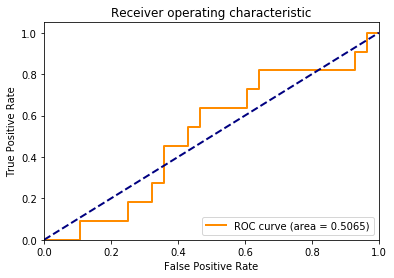

In [105]:
fpr, tpr, thresholds = plot_roc(y_test, pred_classes, pred_prob)

In [130]:
accuracy_score(y_test, pred_classes)

0.2564102564102564

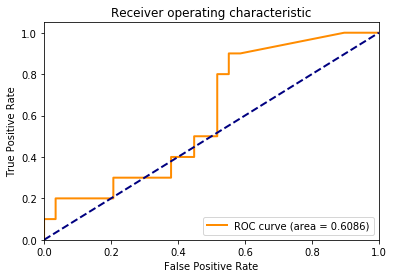

In [129]:
pred_prob = nn_model.predict(x_test)
pred_classes = [1 if x >= 0.5 else 0 for x in pred_prob]
fpr, tpr, thresholds = plot_roc(y_test, pred_classes, pred_prob)

In [2]:
#https://github.com/taposh/audio_processing/blob/master/code/python-code/heart_beat_python.ipynb

In [ ]:
#https://levelup.gitconnected.com/audio-data-analysis-using-deep-learning-part-1-7f6e08803f60